In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


In [ ]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.34,
                                                    random_state=42)

In [ ]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
X_train.shape

(506, 8)

In [ ]:
df.shape

(768, 9)

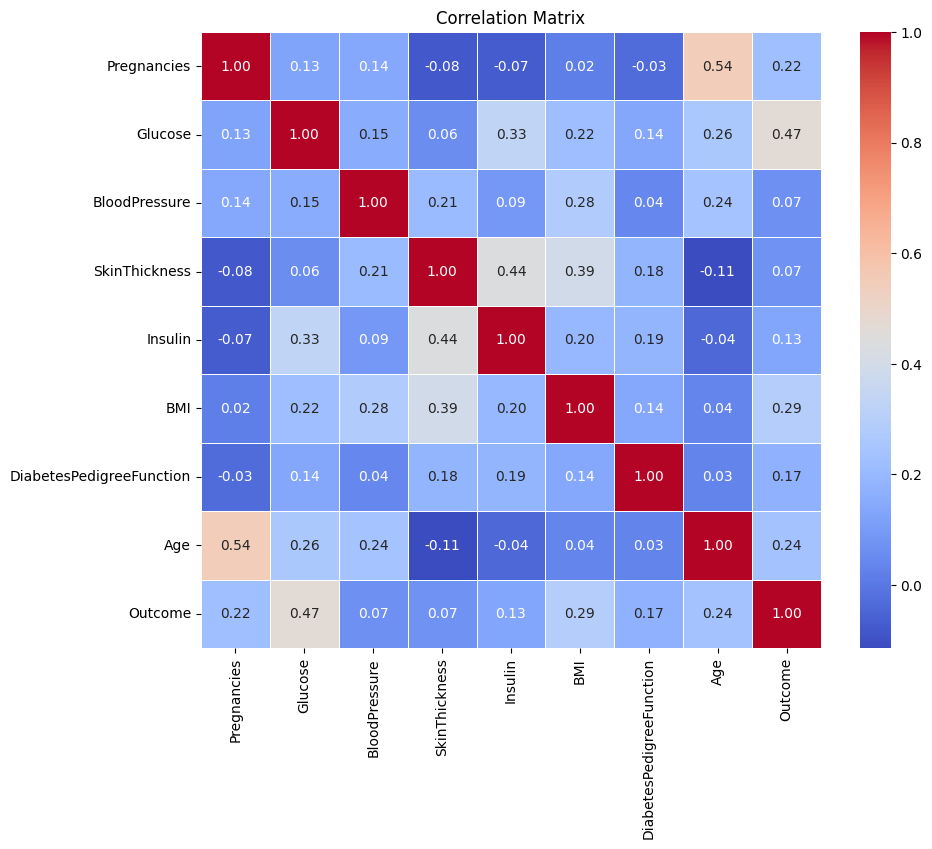

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


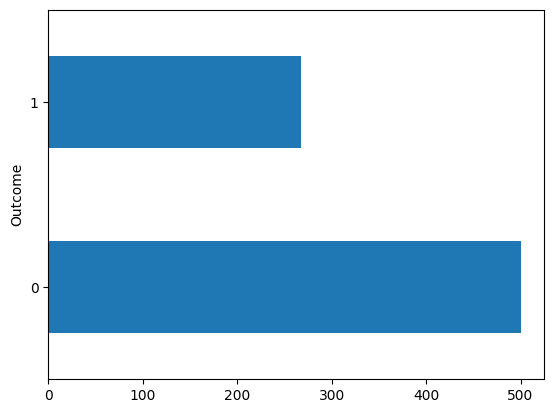

In [ ]:
df["Outcome"].value_counts().plot.barh();

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#Aykırı değer analizi

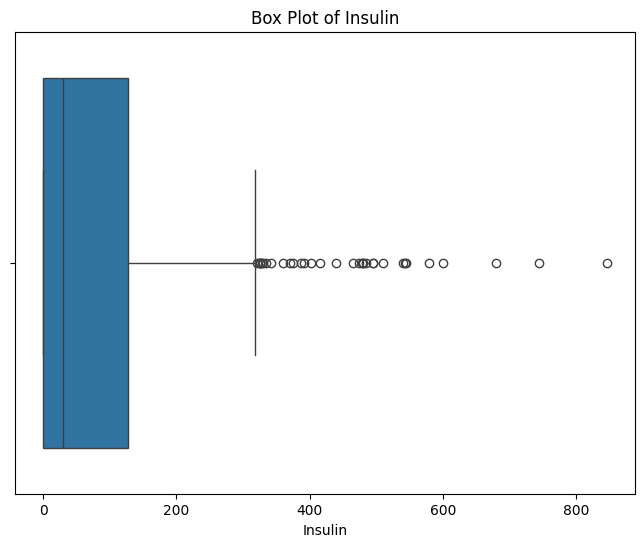

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Insulin'])
plt.title('Box Plot of Insulin')
plt.xlabel('Insulin')
plt.show()


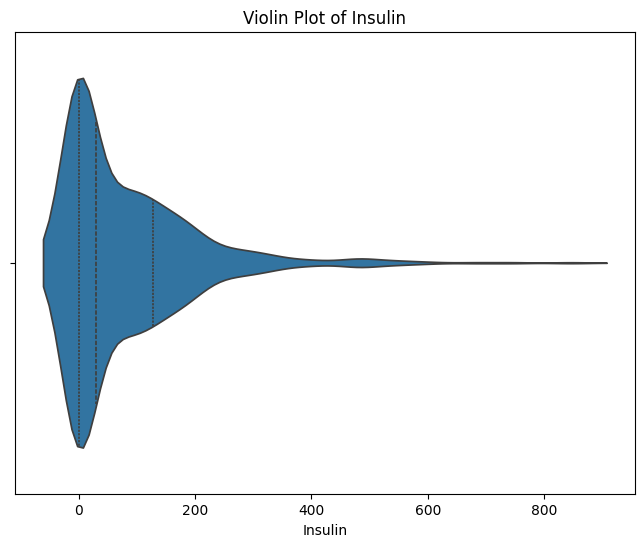

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Insulin'], inner='quartile')
plt.title('Violin Plot of Insulin')
plt.xlabel('Insulin')
plt.show()

In [ ]:
#aykırı değerleri silme işlemi
percentile_threshold = 95

upper_percentile_value = np.percentile(df['Insulin'], percentile_threshold)

trimmed_data = df[df['Insulin'] <= upper_percentile_value]


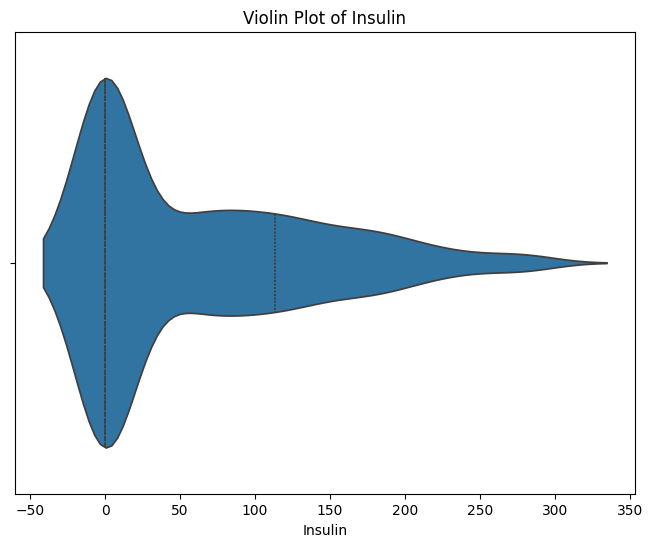

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=trimmed_data['Insulin'], inner='quartile')
plt.title('Violin Plot of Insulin')
plt.xlabel('Insulin')
plt.show()

#Model training

In [ ]:
#model training işlemi
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6984732824427481

#Model tuning

In [ ]:
#model tuning
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametre: " + str(knn_cv.best_params_))

En iyi skor: 0.7448235294117647
En iyi parametre: {'n_neighbors': 40}


In [ ]:
knn = KNeighborsClassifier(37)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.732824427480916

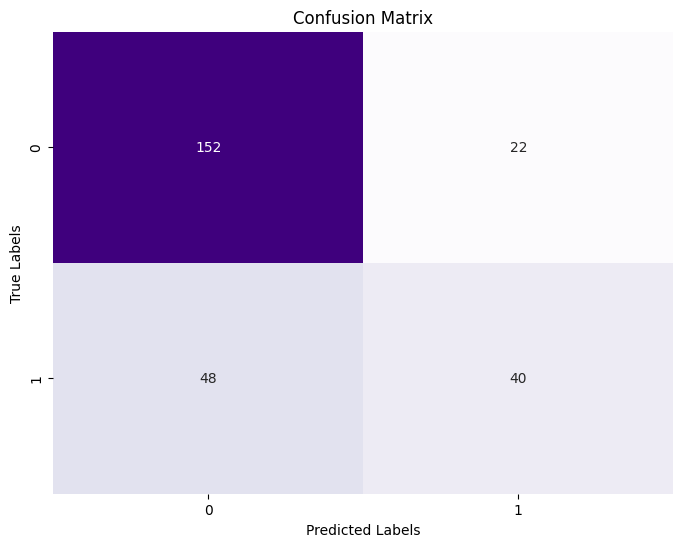

In [ ]:
y_pred = knn_tuned.predict(X_test)

# Konfüzyon matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#PCA deneme

In [ ]:
#pca işlemi
data = diabetes.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Öznitelikleri standartlaştırma
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
from sklearn.decomposition import PCA

# PCA modelini oluşturma
pca = PCA(n_components=2)  # İki bileşen seçelim

# PCA modelini veri setine uygulama
pca_data = pca.fit_transform(scaled_data)


In [ ]:
pca_data.shape

(768, 2)

In [ ]:
# PCA bileşenlerinin varyans oranları
explained_variance_ratio = pca.explained_variance_ratio_
print("Bileşenlerin varyans oranları:", explained_variance_ratio)


Bileşenlerin varyans oranları: [0.26138907 0.19714578]


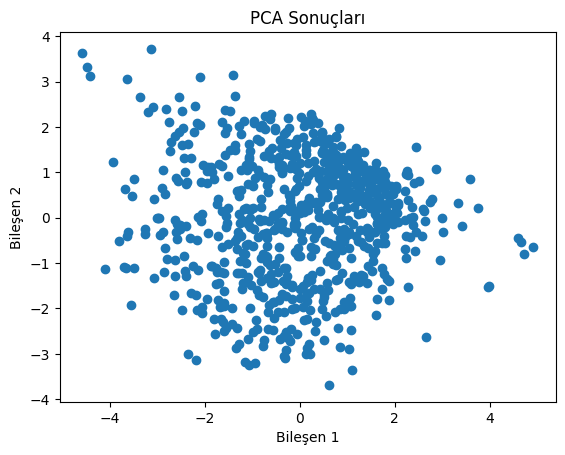

In [ ]:
#bileşenleri görselleştirelim

plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.title('PCA Sonuçları')
plt.show()


In [ ]:

# Yeni özniteliklerle oluşturulan veri seti (pca_data) ve çıktı (outcome)
X = pca_data  # Yeni öznitelikler
y = data['Outcome']  # Çıktı

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Eğitim ve test setlerinin boyutunu kontrol etme
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (506, 2)
Test seti boyutu: (262, 2)


In [ ]:
knn = KNeighborsClassifier(37)
knn_tuned_pca = knn.fit(X_train, y_train)

In [ ]:
knn_tuned_pca.score(X_test, y_test)

0.8244274809160306

#Yalnızca Normalizasyon

In [ ]:
# yalnızca normalizasyon
#Öznitelikleri seçme
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Normalizasyon
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.34, random_state=42)

# KNN modelini eğitme
knn = KNeighborsClassifier(37)
knn.fit(X_train, y_train)

# Modelin performansını değerlendirme
accuracy = knn.score(X_test, y_test)
print("Model accuracy:", accuracy)


Model accuracy: 0.7402597402597403


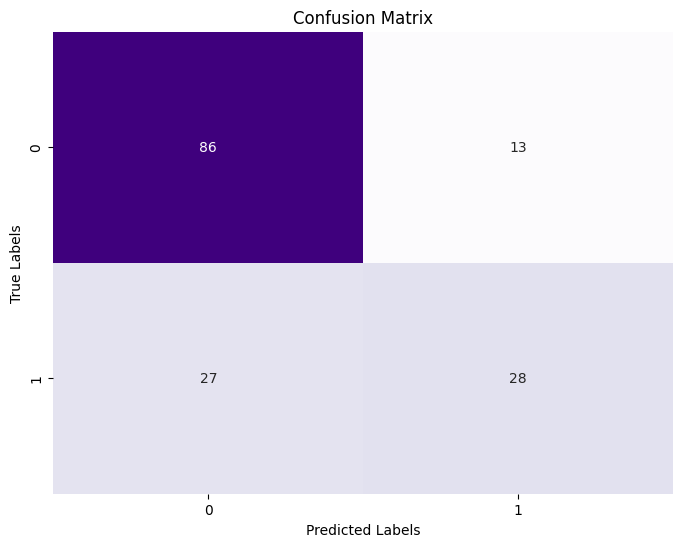

In [ ]:
y_pred = knn.predict(X_test)

# Konfüzyon matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
